# ANN Intro extended

This NB is constructed such that it also runs in reasonable time on Laptop CPUs (e.g. an i3)

It builds on the NB from the last practical.

## Local Setup

There are different options to set up the TensorFlow library (which now includes [Keras](https://keras.io) as backend library) on your own computer. The simplest of them is using only the CPU and can be installed in 1 command via [`conda`](https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/), in an anaconda shell run:

```
conda install tensorflow
```

**NOTE**: TF migth not be compatible with your current environment, so here we create a [new environment](https://conda.io/docs/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands) first:

```
conda create -n tf tensorflow
conda activate tf
```

In that case you need to install jupyter, scikit-learn, matplotlib, numpy and pandas in that environment again, with e.g.:

```
conda install jupyter scikit-learn matplotlib numpy pandas
```

(If you have a [supported Nvidia graphics card](https://developer.nvidia.com/cuda-gpus) in your machine and would like to use it for accelerated network training, make sure to follow [this guide](https://www.tensorflow.org/install/gpu) to install required packages and finally use the `tensorflow-gpu` library.)

The usage of the TensorFlow library in Python will be the same for CPU and GPU.

In [1]:
## fetch MNIST dataset (as done in last NB)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
## Scale the input data into the range [0, 1]
## use sklearn's train_test_split to split the data into 
## 50000 instances for training, 10000 for validation and 10000 for testing
from sklearn.model_selection import train_test_split

X= mnist.data
X= X / 255.0
print(X.max())
y= mnist.target

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

X_train.shape

1.0


(50000, 784)

Now it's time to test your TensorFlow installation by importing the package. The following code cell should execute without errors:

In [3]:
import tensorflow as tf

Now let's check which computing devices TensorFlow has found on this machine. If you don't have the GPU setup on your computer, the list should just contain one CPU: `/device:CPU:0` 

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3981664364061131677
]


The cell below creates a similar MLP as above using tf.keras, see also this [tutorial network](https://github.com/keras-team/keras/blob/fcc0bfa354c5a47625d681d0297a66ef9ff43a9e/examples/mnist_mlp.py) which also uses the MNIST dataset.

Keras has a nice method `model.summary()` that prints a tabular overview of your network architecture, together with the input/output dimensions and number of parameters for each layer.

In [49]:
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 100
num_classes = 10
epochs = 100

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

## convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_val_c = keras.utils.to_categorical(y_val, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense( 50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, y_val_c))

2.3.0
2.4.0
50000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
500/500 [==============================] - 1s 3ms/step - loss: 0.3647 - accuracy: 0.8962 - val_loss: 0.1877 - val_accuracy: 0.9456
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 0.1520 - accuracy: 0.9552 - val_loss: 0.1328 - val_accuracy: 0.9633
Epoch 3/100
500/500 [======================

In [54]:
score = model.evaluate(X_test, y_test_c, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20591486990451813
Test accuracy: 0.9778000116348267


You should see the training going through the epochs and in the end the trained network is evaluated on the test set. 
It shoud reach at least a classification accurary of 97% on the test set.

If you are interested, there is a special [intro to Keras for engineers](https://keras.io/getting_started/intro_to_keras_for_engineers/)

### Exercise 1

Create a visualization of the model architecture (graph) of the keras model composed above using [`plot_model`](https://keras.io/api/utils/model_plotting_utils/). You will probably need to install `pydot`:

`conda install pydot`

As you can see [here](https://keras.io/guides/training_with_built_in_methods/#passing-data-to-multiinput-multioutput-models), ANN architectures can be more complex, like e.g. [GoogLeNet](https://miro.medium.com/max/2700/1*ZFPOSAted10TPd3hBQU8iQ.png).

In [7]:
## print again the model summary (for easiy comparison with the following visualization)
model.summary()
## create a visualization of the model architecture (graph)
tf.keras.utils.plot_model(model,to_file='beispiel.png',show_shapes=True)
print(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


The methode [`fit`](https://keras.io/api/models/model_training_apis/#fit-method) from Keras yields a `history` objekt, which can be used to plot the loss and acc determined during training. This can be done quite selectively (see e.g. [here](https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search)) or with just a few lines using [`pandas`](https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/92b5f83f8a/10_neural_nets_with_keras.ipynb#Building-an-Image-Classifier).

It is also possible to use [TensorBoard](https://www.tensorflow.org/tensorboard) for visualization but this can be more challanging to [get running](https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/92b5f83f8a/10_neural_nets_with_keras.ipynb#TensorBoard).

### Exercise 2

Plot the loss and accuracy of the train and the val set and save the plot as SVG

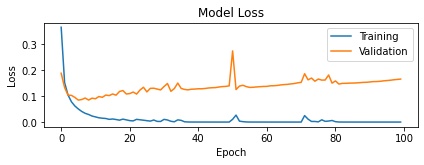

<Figure size 432x288 with 0 Axes>

In [67]:
#plot loss   and val set

import pandas as pd
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()
plt.savefig("loss.svg") 



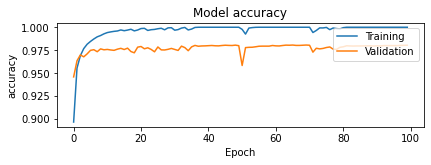

<Figure size 432x288 with 0 Axes>

In [68]:
history_dict.keys()
plt.subplot(212)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()
plt.savefig("accuracy.svg") 

### Question 1

1. What could be the reason for peaks in the loss curves?
2. How could those peaks be avoided?

### Answers

1. the spikes are a consequence of the mini-batch gradient descent in Adam (batch_size = 100). Some mini-batches "happen" to have unfortunate dates for optimization.
2. The spikes are an unavoidable consequence of Mini-Batch Gradient Descent in Adam . we should use another optimizer (SGD) 

### Optional 1

If you have an idea how to avoid/reduce such peaks, try it out and plot the resulting curves again!

### Exercise 3

Now plot the loss and accuracy of the train and the test set (and save the plot as SVG) of your optimized model (from the last exercise of the last notebook), that should reach at least 98% accuracy.

In [61]:
## put the construction and training of your best model here:
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 100
num_classes = 10
epochs = 200

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

## convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

model1 = Sequential()
model1.add(Dense(250, activation='relu', input_shape=(784,)))
model1.add(Dense( 150, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

model1.summary()

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model1.fit(X_train, y_train_c,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_c))

2.3.0
2.4.0
50000 train samples
10000 test samples
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_19 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1510      
Total params: 235,410
Trainable params: 235,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
500/500 [==============================] - 2s 4ms/step - loss: 0.2720 - accuracy: 0.9196 - val_loss: 0.1473 - val_accuracy: 0.9572
Epoch 2/200
500/500 [==============================] - 2s 4ms/step - loss: 0.1035 - accuracy: 0.9690 - val_loss: 0.1149 - val_accuracy: 0.9664
Epoch 3/200
500/500 [====================

500/500 [==============================] - 2s 4ms/step - loss: 8.1301e-10 - accuracy: 1.0000 - val_loss: 0.2157 - val_accuracy: 0.9820
Epoch 108/200
500/500 [==============================] - 2s 5ms/step - loss: 7.6771e-10 - accuracy: 1.0000 - val_loss: 0.2159 - val_accuracy: 0.9820
Epoch 109/200
500/500 [==============================] - 2s 5ms/step - loss: 7.3671e-10 - accuracy: 1.0000 - val_loss: 0.2160 - val_accuracy: 0.9820
Epoch 110/200
500/500 [==============================] - 3s 6ms/step - loss: 6.9380e-10 - accuracy: 1.0000 - val_loss: 0.2163 - val_accuracy: 0.9820
Epoch 111/200
500/500 [==============================] - 3s 5ms/step - loss: 6.6280e-10 - accuracy: 1.0000 - val_loss: 0.2163 - val_accuracy: 0.9820
Epoch 112/200
500/500 [==============================] - 2s 5ms/step - loss: 6.1512e-10 - accuracy: 1.0000 - val_loss: 0.2164 - val_accuracy: 0.9819
Epoch 113/200
500/500 [==============================] - 2s 5ms/step - loss: 5.8413e-10 - accuracy: 1.0000 - val_loss: 0

500/500 [==============================] - 2s 4ms/step - loss: 2.9087e-10 - accuracy: 1.0000 - val_loss: 0.2218 - val_accuracy: 0.9817
Epoch 163/200
500/500 [==============================] - 2s 4ms/step - loss: 2.9564e-10 - accuracy: 1.0000 - val_loss: 0.2221 - val_accuracy: 0.9815
Epoch 164/200
500/500 [==============================] - 2s 4ms/step - loss: 2.7657e-10 - accuracy: 1.0000 - val_loss: 0.2223 - val_accuracy: 0.9817
Epoch 165/200
500/500 [==============================] - 2s 5ms/step - loss: 3.0756e-10 - accuracy: 1.0000 - val_loss: 0.2226 - val_accuracy: 0.9817
Epoch 166/200
500/500 [==============================] - 2s 5ms/step - loss: 3.1233e-10 - accuracy: 1.0000 - val_loss: 0.2230 - val_accuracy: 0.9817
Epoch 167/200
500/500 [==============================] - 2s 4ms/step - loss: 3.2902e-10 - accuracy: 1.0000 - val_loss: 0.2232 - val_accuracy: 0.9816
Epoch 168/200
500/500 [==============================] - 2s 4ms/step - loss: 2.7657e-10 - accuracy: 1.0000 - val_loss: 0

In [63]:
## score your best model
score1= model1.evaluate(X_test, y_test_c, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])


Test loss: 0.23544253408908844
Test accuracy: 0.9817000031471252


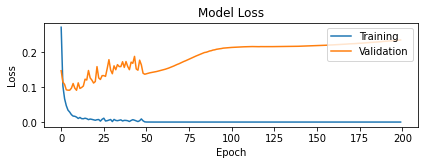

<Figure size 432x288 with 0 Axes>

In [69]:
## plot loss  and val set of your best model

plt.subplot(212)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()
plt.savefig("loss1.svg") 

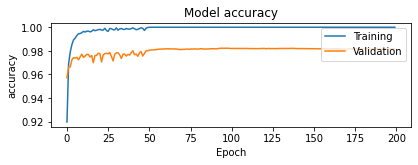

<Figure size 432x288 with 0 Axes>

In [70]:
## plot  acc and val set of your best model
plt.subplot(212)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()
plt.savefig("accuracy1.svg") 

### Question 2

Compare the two plots. 

1. What difference do you see? 
2. Can you explain them?

### Answers

1. in the second loss graph from the 50 epoch there are no more spikes
2. 

To use the model for "production" on a special device (e.g. cash mashine, mobile phone) or in a web service, the model needs to be exported and loaded on the target device.

### Exercise 5

Export your best model in H5 format and then load it again (as you would do on a target device) wiht a different name and test it by running predictions (scoring) on the test set.

In [ ]:
## export model as H5
model1.save('C:\Users\Admin\Desktop\Aufgabe 12')

## load model from H5 under different name

## sore the test set


Model saving can also be used for `EarlyStopping`.

### Optional 2

Train your best model until it obviously overfits the validation data. Use an EarlyStopping callback to get the model when the validation loss/acc was best, following this [tutorial](https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/92b5f83f8a/10_neural_nets_with_keras.ipynb#10.).

Finally check how your best model performs on the (never seen) test set:

### Optional 3

To get a feeling how much work it is to create a training dataset, test the model prediction on some digits you wrote yourself!